## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

MSE (Profundidade = 8) - Treinamento: 12808003618.67
MSE (Profundidade = 8) - Teste: 13356959318.33


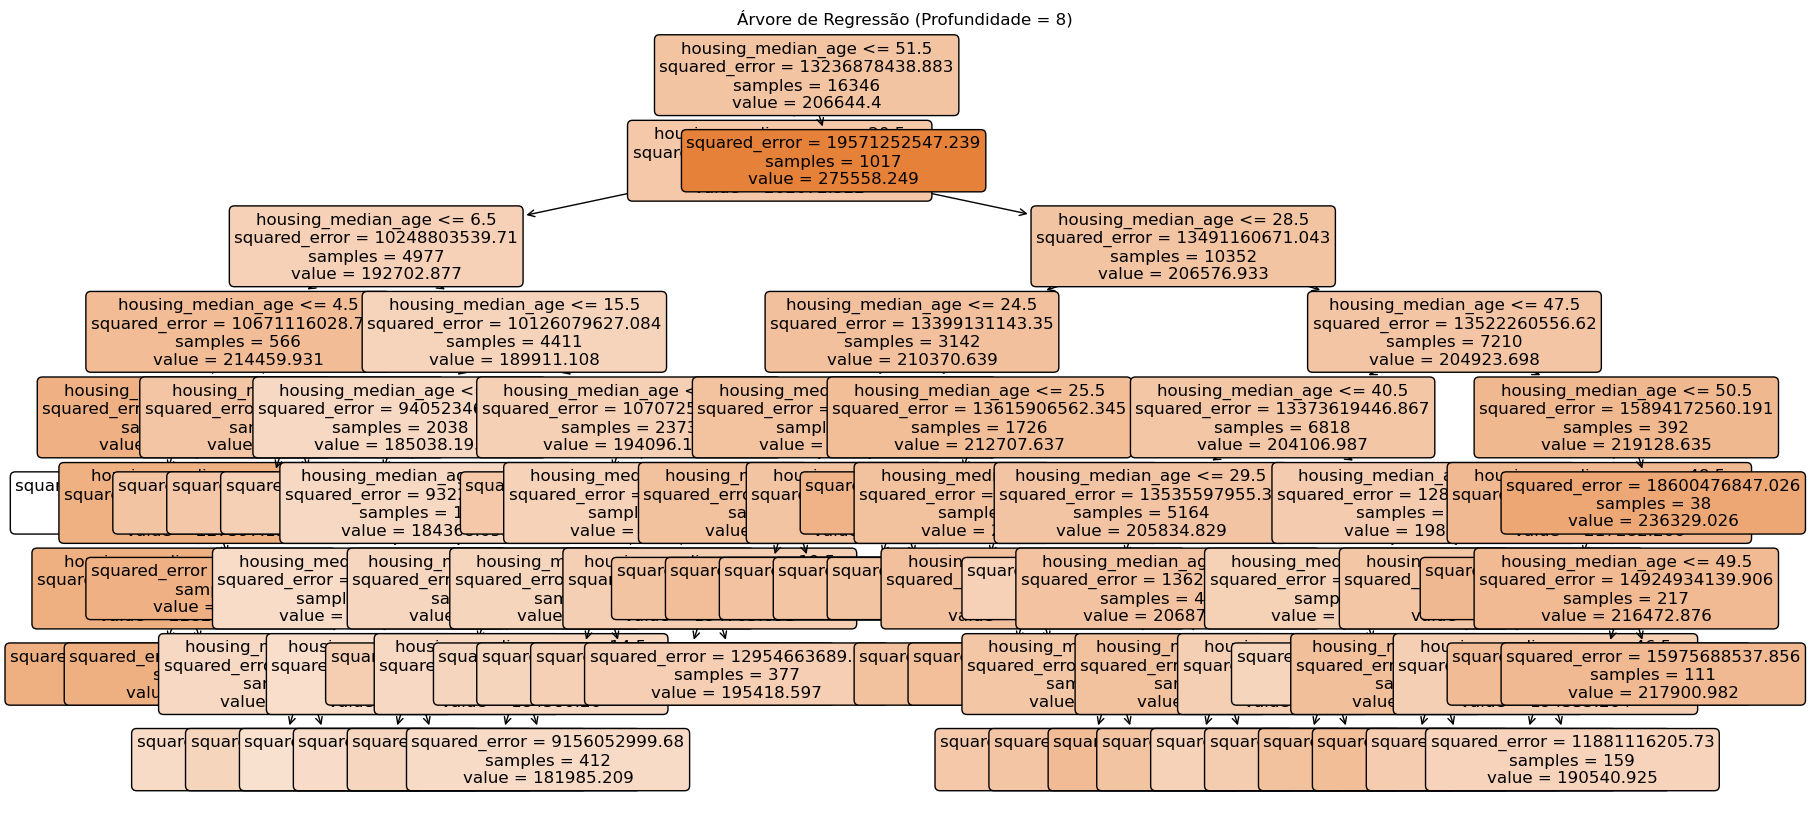

In [27]:
# Removendo linhas com valores ausentes:
df = df.dropna()

# Codificação de variáveis categóricas:
df = pd.get_dummies(df, drop_first=True)

# Definindo as variáveis preditoras e alvo:
X = df[['housing_median_age']]  # Variável preditora
y = df['median_house_value']    # Variável alvo

# Separando os dados em conjunto de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando a árvore de regressão com profundidade máxima = 8:
tree_regressor_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_regressor_8.fit(X_train, y_train)

# Prevendo no conjunto de treinamento e teste com árvore de profundidade = 8:
y_train_pred_8 = tree_regressor_8.predict(X_train)
y_test_pred_8 = tree_regressor_8.predict(X_test)

# Calculando o MSE para árvore com profundidade = 8:
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

# Exibindo os resultados:
print(f'MSE (Profundidade = 8) - Treinamento: {mse_train_8:.2f}')
print(f'MSE (Profundidade = 8) - Teste: {mse_test_8:.2f}')

# Visualizando a árvore de regressão com profundidade máxima = 8:
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_regressor_8, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.title('Árvore de Regressão (Profundidade = 8)')
plt.show()


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

CCP Alphas:
[0.00000000e+00 8.92396817e+01 6.50613784e+03 6.90088465e+03
 2.27695818e+04 2.54122161e+04 2.54317263e+04 5.16881814e+04
 7.79087231e+04 8.88801684e+04 1.95638816e+05 2.03445315e+05
 2.15728229e+05 2.55413235e+05 2.59991054e+05 2.94720457e+05
 2.95508769e+05 3.29576028e+05 5.08728714e+05 5.29155488e+05
 7.61608095e+05 1.00684129e+06 1.04308416e+06 1.22599962e+06
 1.46534628e+06 3.07282360e+06 3.34050093e+06 3.49824637e+06
 3.85143840e+06 4.10968798e+06 4.54460363e+06 5.50312290e+06
 1.84942071e+07 3.95797895e+07 3.15079493e+08]

Impurezas correspondentes (soma dos erros dos nós):
[1.28080036e+10 1.28080037e+10 1.28080102e+10 1.28080171e+10
 1.28080399e+10 1.28080907e+10 1.28081161e+10 1.28081678e+10
 1.28082457e+10 1.28083346e+10 1.28085303e+10 1.28087337e+10
 1.28089494e+10 1.28092048e+10 1.28097248e+10 1.28100195e+10
 1.28103151e+10 1.28106446e+10 1.28111534e+10 1.28116825e+10
 1.28124441e+10 1.28134510e+10 1.28165802e+10 1.28178062e+10
 1.28207369e+10 1.28268826e+10 1.2

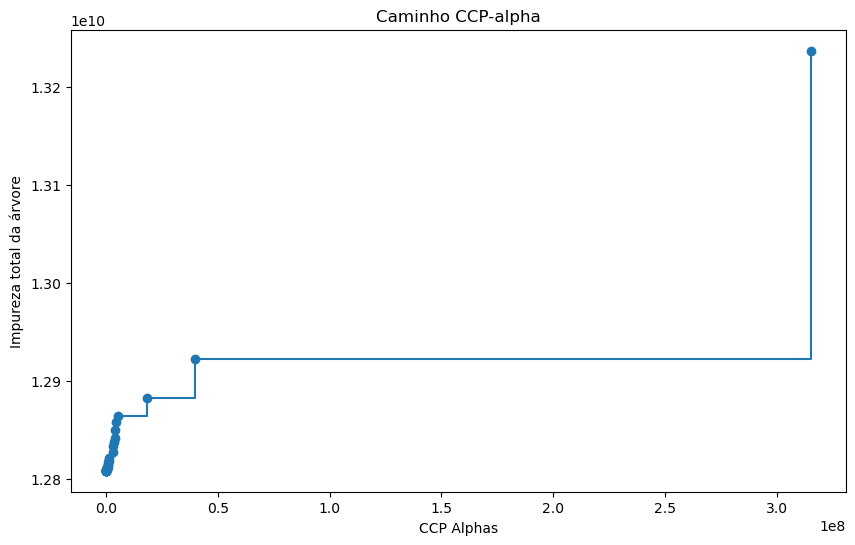

In [30]:
# Calculando o caminho indicado pelos valores de CCP-alpha:
path = tree_regressor_8.cost_complexity_pruning_path(X_train, y_train)

# Extraindo os valores de CCP-alpha e o número de nós de folha correspondentes:
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Exibindo os valores de CCP-alpha e o número de nós de folha:
print("CCP Alphas:")
print(ccp_alphas)
print("\nImpurezas correspondentes (soma dos erros dos nós):")
print(impurities)

# Visualizando o caminho CCP-alpha:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("CCP Alphas")
plt.ylabel("Impureza total da árvore")
plt.title("Caminho CCP-alpha")
plt.show()


### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [32]:
# Lista para armazenar as árvores treinadas:
trees = []

# Treinando uma árvore para cada valor de ccp_alpha:
for alpha in ccp_alphas:
    tree_regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree_regressor.fit(X_train, y_train)
    trees.append(tree_regressor)

# Exibindo o número de árvores treinadas:
print(f"Número de árvores treinadas: {len(trees)}")


Número de árvores treinadas: 35


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [34]:
# Listas para armazenar os MSEs das árvores:
mse_train_list = []
mse_test_list = []

# Calculando o MSE para cada árvore na lista:
for tree_regressor in trees:
    # Previsões no conjunto de treinamento e teste
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    # Calculando o MSE:
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Armazenando os MSEs nas listas:
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Exibindo os resultados:
for i, alpha in enumerate(ccp_alphas):
    print(f'Árvore com CCP Alpha = {alpha:.6f}:')
    print(f'  MSE - Treinamento: {mse_train_list[i]:.2f}')
    print(f'  MSE - Teste: {mse_test_list[i]:.2f}\n')


Árvore com CCP Alpha = 0.000000:
  MSE - Treinamento: 12803262524.33
  MSE - Teste: 13363408723.60

Árvore com CCP Alpha = 89.239682:
  MSE - Treinamento: 12803262613.57
  MSE - Teste: 13363365935.05

Árvore com CCP Alpha = 6506.137843:
  MSE - Treinamento: 12803269119.71
  MSE - Teste: 13363577886.90

Árvore com CCP Alpha = 6900.884651:
  MSE - Treinamento: 12803276020.59
  MSE - Teste: 13363604854.63

Árvore com CCP Alpha = 22769.581791:
  MSE - Treinamento: 12803325746.29
  MSE - Teste: 13363658705.67

Árvore com CCP Alpha = 25412.216053:
  MSE - Treinamento: 12803376570.72
  MSE - Teste: 13363304730.17

Árvore com CCP Alpha = 25431.726315:
  MSE - Treinamento: 12803402002.45
  MSE - Teste: 13362948334.38

Árvore com CCP Alpha = 51688.181395:
  MSE - Treinamento: 12803498594.63
  MSE - Teste: 13364151030.24

Árvore com CCP Alpha = 77908.723071:
  MSE - Treinamento: 12803647239.61
  MSE - Teste: 13363314206.82

Árvore com CCP Alpha = 88880.168378:
  MSE - Treinamento: 12803736119.78


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

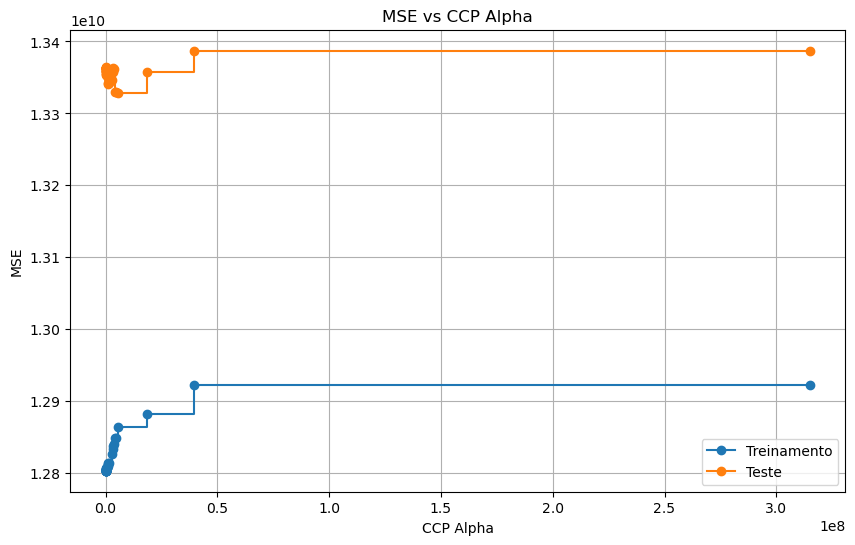

O melhor CCP Alpha é: 5503122.904140
Com MSE no conjunto de teste: 13328777861.91


In [37]:
# Plotando o MSE pelo alpha para treinamento e teste:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_train_list, marker='o', label='Treinamento', drawstyle="steps-post")
plt.plot(ccp_alphas, mse_test_list, marker='o', label='Teste', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("MSE")
plt.title("MSE vs CCP Alpha")
plt.legend()
plt.grid(True)
plt.show()

# Encontrando o valor de alpha com menor MSE no conjunto de teste:
min_mse_index = mse_test_list.index(min(mse_test_list))
best_ccp_alpha = ccp_alphas[min_mse_index]

# Exibindo o melhor valor de CCP Alpha:
print(f'O melhor CCP Alpha é: {best_ccp_alpha:.6f}')
print(f'Com MSE no conjunto de teste: {mse_test_list[min_mse_index]:.2f}')


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [41]:
from sklearn.metrics import r2_score

# Obtendo a árvore com o melhor ccp_alpha:
best_tree = trees[min_mse_index]

# Prevendo no conjunto de teste:
y_test_pred_best = best_tree.predict(X_test)

# Calculando o R-quadrado no conjunto de teste:
r2 = r2_score(y_test, y_test_pred_best)

# Exibindo o R-quadrado:
print(f'R-quadrado da árvore com melhor CCP Alpha ({best_ccp_alpha:.6f}): {r2:.2f}')


R-quadrado da árvore com melhor CCP Alpha (5503122.904140): 0.03


### 7. Visualize esta árvore.

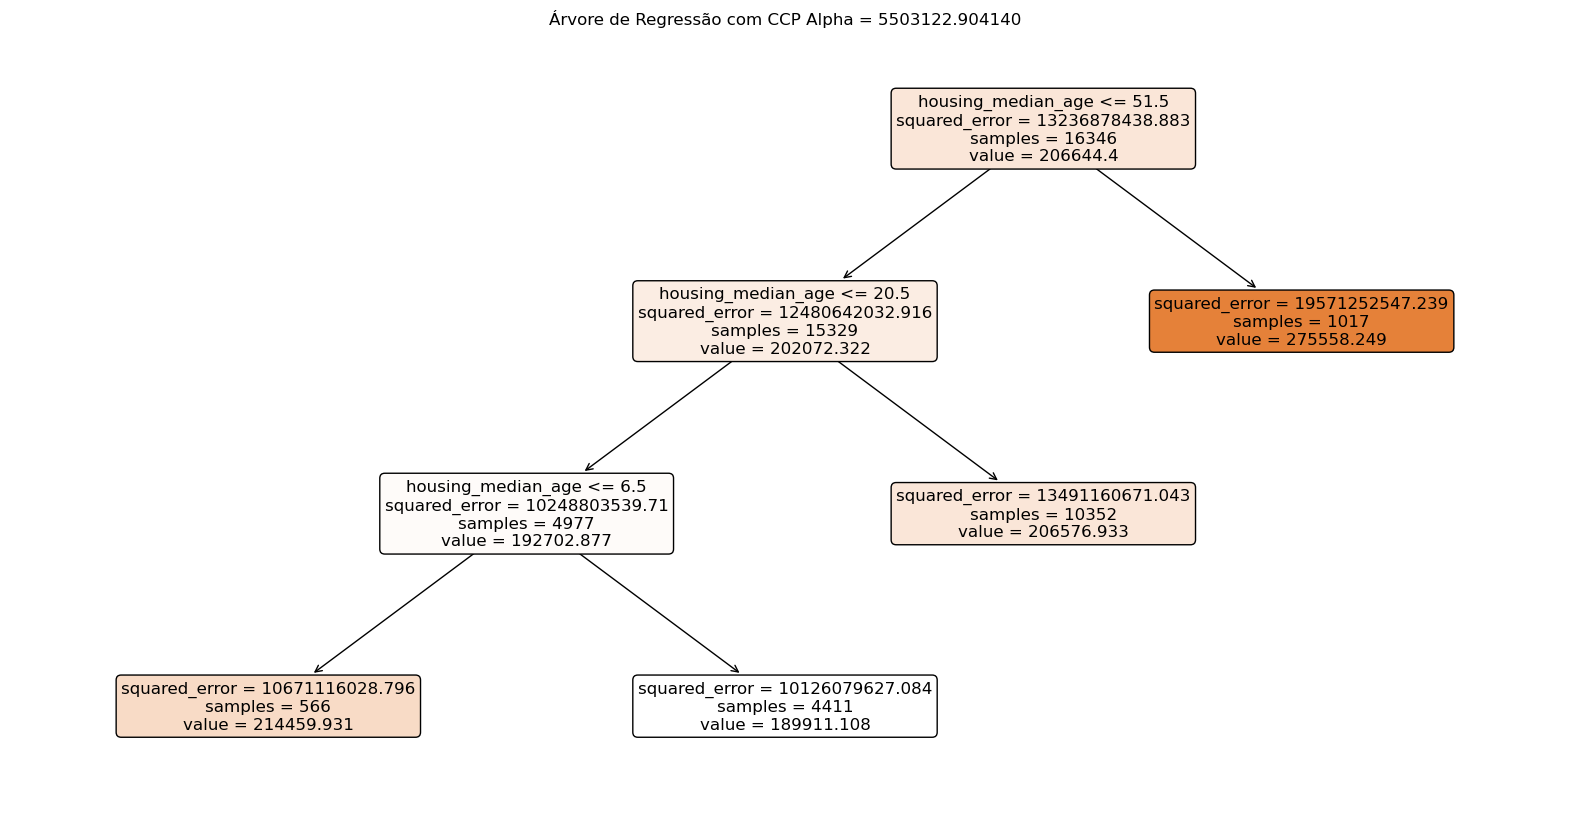

In [44]:
# Visualizando a árvore com o melhor ccp_alpha:
plt.figure(figsize=(20, 10))
tree.plot_tree(best_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.title(f'Árvore de Regressão com CCP Alpha = {best_ccp_alpha:.6f}')
plt.show()
